In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
BOARD_SIZE = 8 # размер доски

In [3]:
POPULATION_SIZE = BOARD_SIZE * 5 # размер популяции
P_CROSSOVER = 0.9 # вер-ть кроссинговера
P_MUTATION = 0.1 # вер-ть мутации отдельной особи
MAX_GENERATION = 50 # кол-во поколений

In [4]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [5]:
class FitnessMax:
    def __init__(self):
        self.values = [-BOARD_SIZE*BOARD_SIZE]

class Individual(list):
    def __init__(self, *args):
        super().__init__(*args)
        self.fitness = FitnessMax()

In [8]:
def shuffle(ind):
    random.shuffle(ind)
    return ind[:]

def fitness(ind):
    value = 0
    for i in range(len(ind)):
        for j in range(i+1, len(ind)):
            if j - i == abs(ind[i] - ind[j]):
                value += 1 
    return -value, 
 
def individual_creater():
    return Individual(shuffle(list(range(BOARD_SIZE))))

def population_creater(n):
    return list([individual_creater() for _ in range(n)])

In [9]:
population = population_creater(POPULATION_SIZE)
generation_counter = 0

In [10]:
max_fitness_values = []
mean_fitness_values = []

In [11]:
def clone(values):
    ind = Individual(values[:])
    ind.fitness.values = values.fitness.values[:]
    return ind

In [12]:
def sel_tournament(population):
    p_len = len(population)
    offsprings = []
    for i in range(p_len):
        i1 = i2 = i3 = 0
        
        while i1 == i2 or i2 == i3 or i3 == i1:
            i1, i2, i3 = random.randint(0, p_len-1), random.randint(0, p_len-1), random.randint(0, p_len-1)
            
        offsprings.append(max([population[i1], population[i2], population[i3]], key=lambda ind: ind.fitness.values[0]))
    return offsprings

In [13]:
def crossover(parent1, parent2):
    s = random.randint(2, len(parent1)-3)
    p1, p2 = parent1[:], parent2[:]
    parent1[s:] = p2[s:]
    parent2[s:] = p1[s:]
    
    def remove_duplicates(ind, index):
        s = set(ind[index:])
        for i in range(index):
            if ind[i] not in s:
                s.add(ind[i])
        
        for i in range(index):
            if ind[i] in s:
                if len(s) == BOARD_SIZE:
                    break
                ind[i] = random.choice(tuple(set(range(BOARD_SIZE)) - s))
                s.add(ind[i])
                
    remove_duplicates(parent1, s)
    remove_duplicates(parent2, s)

In [14]:
def mutation(ind, p=0.01):
    candidates = []
    for i in range(len(ind)):
        if random.random() < p:
            candidates.append(i)
            
    if len(candidates) < 2:
        return
    
    random.shuffle(candidates)
    ind[candidates[0]], ind[candidates[1]] = ind[candidates[1]], ind[candidates[0]]

In [15]:
fitness_values = [ind.fitness.values[0] for ind in population]

In [16]:
while max(fitness_values) < 0 and generation_counter < MAX_GENERATION:
    generation_counter += 1
    
    offsptings = sel_tournament(population)
    offsptings = list(map(clone, offsptings))
    
    for parent1, parent2 in zip(offsptings[::2], offsptings[1::2]):
        if random.random() < P_CROSSOVER:
            crossover(parent1, parent2)
    
    for ind in offsptings:
        if random.random() < P_CROSSOVER:
            mutation(ind, 1.0/BOARD_SIZE)
            
    for ind in offsptings:
        ind.fitness.values = fitness(ind)
        
    population = offsptings[:]
    
    fitness_values = [ind.fitness.values[0] for ind in population]
    
    print(f"Поколение {generation_counter}: Мин пересечение = {max(fitness_values)}, Средняя приспособ.= {sum(fitness_values) / len(population)}")
    
    max_fitness_values.append(max(fitness_values))
    mean_fitness_values.append(sum(fitness_values) / len(population))

Поколение 1: Мин пересечение = -2, Средняя приспособ.= -5.225
Поколение 2: Мин пересечение = -1, Средняя приспособ.= -4.4
Поколение 3: Мин пересечение = -1, Средняя приспособ.= -4.2
Поколение 4: Мин пересечение = -1, Средняя приспособ.= -3.575
Поколение 5: Мин пересечение = -1, Средняя приспособ.= -3.7
Поколение 6: Мин пересечение = -1, Средняя приспособ.= -3.625
Поколение 7: Мин пересечение = -1, Средняя приспособ.= -3.35
Поколение 8: Мин пересечение = -1, Средняя приспособ.= -3.05
Поколение 9: Мин пересечение = -1, Средняя приспособ.= -3.125
Поколение 10: Мин пересечение = 0, Средняя приспособ.= -2.45


In [17]:
fitness(sorted(population, key=lambda ind: ind.fitness.values[0])[-1])

(0,)

In [18]:
sorted(population, key=lambda ind: ind.fitness.values[0])[-1]

[3, 0, 4, 7, 1, 6, 2, 2]

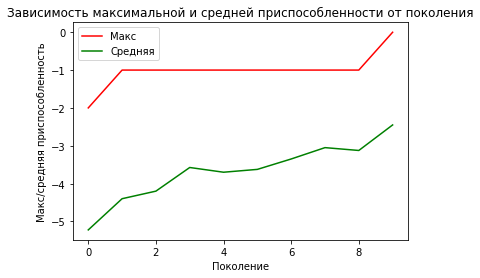

In [19]:
plt.plot(max_fitness_values, color='red')
plt.plot(mean_fitness_values, color='green')
plt.legend(['Макс', 'Cредняя'])
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.show()